<a href="https://colab.research.google.com/github/hjgobbo/python_course/blob/main/presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Imagens** em Python

"Análise de imagens é a **extração de informações** significativas de imagens; principalmente de **imagens digitais** por meio de técnicas de processamento digital de imagens." [SOLOMON, Chris; BRECKON, Toby *in* Wikipedia](https://en.wikipedia.org/wiki/Image_analysis#cite_note-solomonbreckon10fundamentals-1)

# Roteiro

1. Sobre "imagens digitais";

2. Sobre "extrair informações de imagens";

3. Sobre problemas grandes e estratégias para resolvê-los.

4. O Fim.

# Imagens digitais

In [68]:
from matplotlib import pyplot, image      # Módulos para leitura e exibição de imagens.
import numpy                              # Pacote para manipulação de dados multidimensionais.

In [69]:
img1 = image.imread('/content/titanium_oxide.jpg')   # Atribuição de imagem à variável.

print(type(img1))
print(img1.shape)
print(img1)

<class 'numpy.ndarray'>
(555, 750, 3)
[[[219 131  46]
  [219 134  44]
  [215 139  40]
  ...
  [171 102  33]
  [171 102  36]
  [171 101  33]]

 [[217 135  46]
  [218 133  48]
  [219 137  46]
  ...
  [169  97  37]
  [173  96  37]
  [177  96  36]]

 [[216 135  45]
  [215 140  45]
  [225 135  48]
  ...
  [170  98  34]
  [171  99  36]
  [172  98  35]]

 ...

 [[ 29   9  10]
  [ 31  10   8]
  [ 31  12  10]
  ...
  [143  92  33]
  [109  71  29]
  [ 68  46  28]]

 [[ 28  11   9]
  [ 32  12   8]
  [ 32  11  10]
  ...
  [107  70  32]
  [ 60  40  25]
  [ 38  22  18]]

 [[ 27  12   7]
  [ 32  12   9]
  [ 31  12   8]
  ...
  [ 68  48  29]
  [ 37  20  20]
  [ 27  14  13]]]


In [70]:
print(img1.max()) # Valor máximo de um dos canais da 'img1'
print(img1.min()) # Valor mínimo de um dos canais da 'img1'

255
2


> 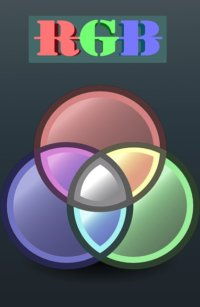



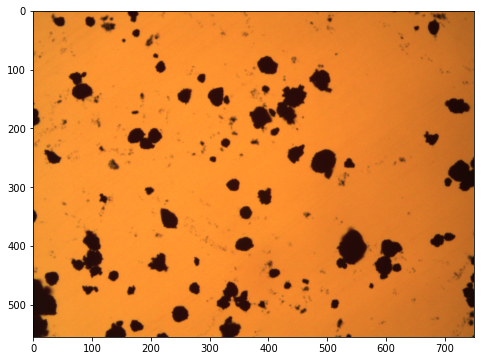

In [71]:
pyplot.figure(figsize=(8,6))    # Exibição da imagem: definição do tamanho.
pyplot.imshow(img1)             # Exibição da imagem.

In [72]:
def separate_rgb(picture, channel="R"):
  '''
  separate_rgb: retorna uma imagem contendo apenas um canal de cor RGB.

    picture: imagem a ser processada. type: 'numpy.ndarray'.

    channel: canal de cor a ser preservado. R = vermelho, G = verde, B = azul.
  '''
  condition = {
      'R': 0,
      'G': 1,
      'B': 2
  }

  n = condition[channel.upper()] # Atribui a posição do canal a ser preservado.

  new_picture = numpy.zeros((len(picture), len(picture[0]), 3), dtype='uint8') # Definição de uma matriz nula com dimensões de 'picture'.
  
  # Substitui nas posições da matriz nula os valores de cor do canal selecionado.
  for i in range(len(picture)):
    for j in range(len(picture[0])):
      new_picture[i][j][n] = picture[i][j][n]
  # -----------------------------------------------------------------------------

  return new_picture

(<matplotlib.axes._subplots.AxesSubplot at 0x7f95763f5048>,
 <matplotlib.image.AxesImage at 0x7f95763d79b0>)

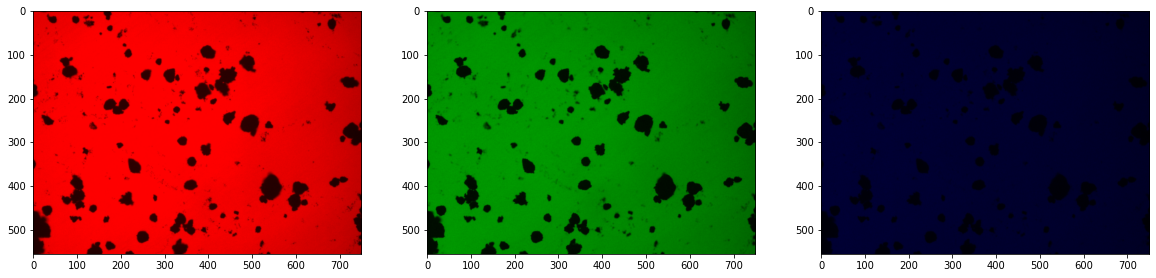

In [73]:
img1_red = separate_rgb(img1, channel= 'R')     # Separação do canal 'vermelho' de 'img1'.
img1_green = separate_rgb(img1, channel= 'G')   # Separação do canal 'verde' de 'img1'.
img1_blue = separate_rgb(img1, channel= 'B')    # Separação do canal 'azul' de 'img1'.

pyplot.figure(figsize=(20, 30))                 # Exibição da imagem: definição do tamanho.
pyplot.subplot(131),pyplot.imshow(img1_red)     # Exibição da imagem: linha 1, coluna 1.
pyplot.subplot(132),pyplot.imshow(img1_green)   # Exibição da imagem: linha 1, coluna 2.
pyplot.subplot(133),pyplot.imshow(img1_blue)    # Exibição da imagem: linha 1, coluna 3.

In [74]:
print(img1_green)

[[[  0 131   0]
  [  0 134   0]
  [  0 139   0]
  ...
  [  0 102   0]
  [  0 102   0]
  [  0 101   0]]

 [[  0 135   0]
  [  0 133   0]
  [  0 137   0]
  ...
  [  0  97   0]
  [  0  96   0]
  [  0  96   0]]

 [[  0 135   0]
  [  0 140   0]
  [  0 135   0]
  ...
  [  0  98   0]
  [  0  99   0]
  [  0  98   0]]

 ...

 [[  0   9   0]
  [  0  10   0]
  [  0  12   0]
  ...
  [  0  92   0]
  [  0  71   0]
  [  0  46   0]]

 [[  0  11   0]
  [  0  12   0]
  [  0  11   0]
  ...
  [  0  70   0]
  [  0  40   0]
  [  0  22   0]]

 [[  0  12   0]
  [  0  12   0]
  [  0  12   0]
  ...
  [  0  48   0]
  [  0  20   0]
  [  0  14   0]]]


Resumir é possível!

>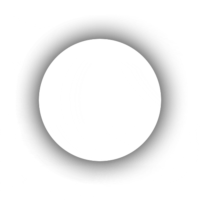

In [75]:
def to_gray(picture):
  '''
  to_gray: retorna uma imagem em escala de cinza, combinando os canais RGB.

    picture: imagem a ser processada. type: 'numpy.ndarray'.
  '''

  new_picture = numpy.zeros((len(picture), len(picture[0])), dtype='uint8') # Definição de uma matriz nula com mesmo número de linhas e colunas de 'picture'.

  # Substitui nas posições da matriz nula o valor de cinza calculado.
  for i in range(len(picture)):
    for j in range(len(picture[0])):
      new_picture[i][j] = 0.21*picture[i][j][0] + 0.72*picture[i][j][1] + 0.07*picture[i][j][2] # Média ponderada dos valores de cor.
  # -----------------------------------------------------------------
  
  return new_picture

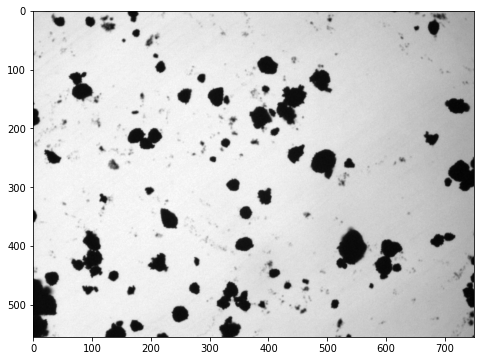

In [76]:
img1_gray = to_gray(img1)                 # Conversão de 'img1' para níveis de cinza.

pyplot.figure(figsize=(8,6))              # Exibição da imagem: definição do tamanho.
pyplot.imshow(img1_gray, cmap = 'gray')   # Exibição da imagem.            

In [77]:
print(type(img1_gray))
print(img1_gray.shape)
print(img1_gray)

<class 'numpy.ndarray'>
(555, 750)
[[143 145 148 ... 111 111 110]
 [145 144 147 ... 107 108 108]
 [145 149 147 ... 108 109 109]
 ...
 [ 13  14  15 ...  98  76  49]
 [ 14  15  15 ...  75  43  25]
 [ 14  15  15 ...  50  23  16]]


# Extrair informações de imagens


(<matplotlib.axes._subplots.AxesSubplot at 0x7f95762c82e8>,
 <matplotlib.image.AxesImage at 0x7f957629bfd0>)

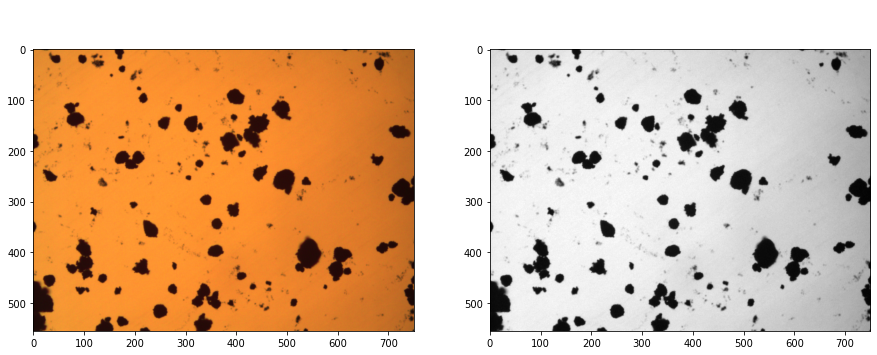

In [78]:
pyplot.figure(figsize=(15, 20))                                                   # Exibição da imagem: definição do tamanho.
pyplot.suptitle("Óxido de titânio em pó", color = 'white', fontsize = 20, y=0.63) # Exibição da imagem: definição do título.
pyplot.subplot(121),pyplot.imshow(img1)                                           # Exibição da imagem: linha 1, coluna 1.
pyplot.subplot(122),pyplot.imshow(img1_gray, cmap='gray')                         # Exibição da imagem: linha 1, coluna 2.

"The dark side of the powder"

> 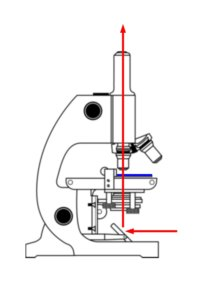

(array([    0.,     0.,     0.,   127.,  1321.,  4902.,  7315.,  8645.,
         2895.,  2356.,  1403.,   669.,   816.,   459.,   661.,   389.,
          553.,   350.,   499.,   306.,   443.,   452.,   308.,   405.,
          253.,   406.,   254.,   383.,   256.,   415.,   421.,   312.,
          423.,   307.,   494.,   336.,   500.,   397.,   568.,   430.,
          660.,   795.,   637.,  1482.,  1686.,  4135.,  4160.,  6967.,
         5556.,  9320., 10180.,  7404., 12605.,  9482., 15307., 10777.,
        17021., 13177., 22255., 15885., 24609., 27357., 24061., 57059.,
        42923., 26966.,  2237.,   118.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95

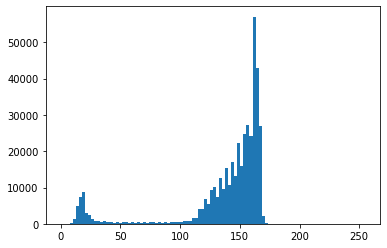

In [79]:
pyplot.hist(img1_gray.flat, bins=100, range=(0,255)) # Contrução de histograma com amostra dos níveis de cinza de 'img1'

In [80]:
def threshold(picture, gray_level = 128):
  '''
  threshold: retorna uma imagem contendo uma máscara definida apartir de um valor de nível de cinza.

    picture: imagem a ser processada. type: 'numpy.ndarray'.

    gray_level: nível de cinza limiar escolhido para elaboração da máscara.
  '''

  new_picture = numpy.zeros((len(picture), len(picture[0])), dtype='uint8') # Definição de uma matriz nula com mesmo número de linhas e colunas de 'picture'.
 
  # Substitui na posição da matriz nula (branco) o valor 255 (preto) quando a equivalente na imagem é maior que o limiar.
  for i in range(len(picture)):
    for j in range(len(picture[0])):
      if picture[i][j] > gray_level:
        new_picture[i][j] = 255
  # ---------------------------------------------------------------------------------------------------------------------
  
  return new_picture

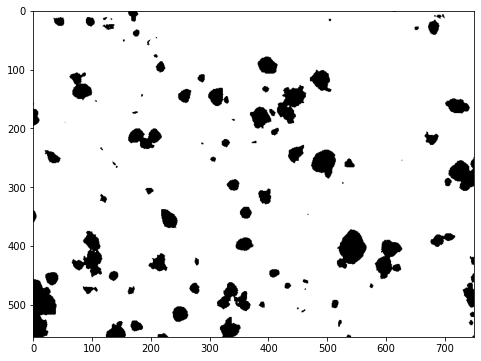

In [81]:
threshold_img1 = threshold(img1_gray, gray_level=50) # Criação de máscara apartir de 'img1'.

pyplot.figure(figsize=(8,6))                         # Exibição da imagem: definição do tamanho.
pyplot.imshow(threshold_img1, cmap='gray')           # Exibição da imagem.

In [82]:
def sort_line(picture):
  '''
  sort_line: retorna uma imagem em escala de cinza, com os valores dos pixels em ordem crescente em cada uma das linhas.

    picture: imagem em escala de cinza a ser processada. type: 'numpy.ndarray'.
  '''

  new_picture = numpy.zeros((len(picture), len(picture[0])), dtype='uint8') # Definição de uma matriz nula com mesmo número de linhas e colunas de 'picture'.

  # Substitui nas posições da matriz nula os valores em ordem crescente dos pixels de 'picture'.
  for i in range(len(picture)):
      new_picture[i] = sorted(list(picture[i]))
  # -----------------------------------------------------------------
  
  return new_picture

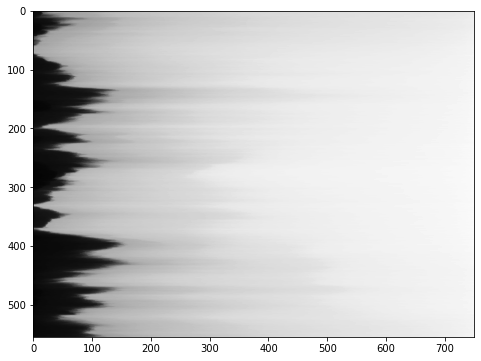

In [83]:
sorted_img1 = sort_line(img1_gray)

pyplot.figure(figsize=(8,6))              # Exibição da imagem: definição do tamanho.
pyplot.imshow(sorted_img1, cmap = 'gray')   # Exibição da imagem.

(array([    0.,     0.,     0.,   127.,  1321.,  4902.,  7315.,  8645.,
         2895.,  2356.,  1403.,   669.,   816.,   459.,   661.,   389.,
          553.,   350.,   499.,   306.,   443.,   452.,   308.,   405.,
          253.,   406.,   254.,   383.,   256.,   415.,   421.,   312.,
          423.,   307.,   494.,   336.,   500.,   397.,   568.,   430.,
          660.,   795.,   637.,  1482.,  1686.,  4135.,  4160.,  6967.,
         5556.,  9320., 10180.,  7404., 12605.,  9482., 15307., 10777.,
        17021., 13177., 22255., 15885., 24609., 27357., 24061., 57059.,
        42923., 26966.,  2237.,   118.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95

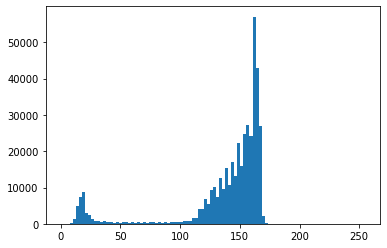

In [84]:
pyplot.hist(sorted_img1.flat, bins=100, range=(0,255)) # Contrução de histograma com amostra dos níveis de cinza de 'img1'

## Determinação de características dimensionais das partículas

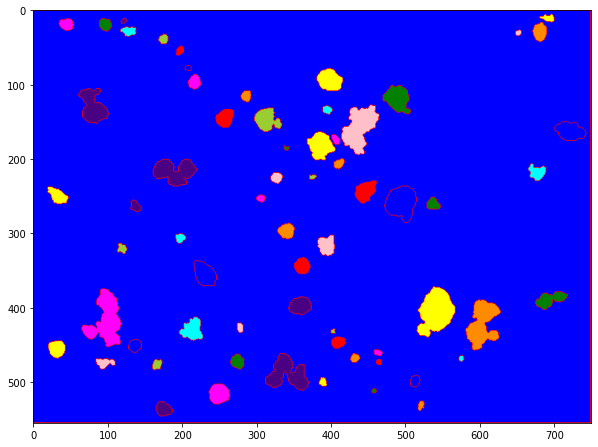

In [85]:
import cv2                                            # Biblioteca (OpenCV) para realizar processamento de imagens.
from skimage import measure, color, io                # Módulos para realizar análise de imagens.
from skimage.segmentation import clear_border

image = cv2.imread("/content/titanium_oxide.jpg")     # Atribuição de imagem à variável.

image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)      # Conversão de 'image' para níveis de cinza.
image1 = cv2.bitwise_not(image1)                      # Inversão de cores (necessária ao processamento).

pixels_to_um = 1.2                                    # Estabelecimento da escala 1 pixel = 1,2 um.

ret1, thresh = cv2.threshold(image1, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) #Limiarização (threshold) automática: método da variância mínima.

kernel = numpy.ones((3,3), dtype='uint8')
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)  # Remoção de ruido (pixels).
opening = clear_border(opening)                                           # Desconsideração de partículas na borda da imagem.

# Determinação da região de fronteira entre as partículas e o fundo
sure_bg = cv2.dilate(opening,kernel,iterations=1) # Erosão para marcar o fundo

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) # Determinação do centro das partículas (pixel central tem o valor aumetado pela distância que está da borda).
ret2, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0) #Limiarização (threshold) a partir dos valores dos pixel centrais das partículas.
sure_fg = numpy.uint8(sure_fg)

unknown = cv2.subtract(sure_bg,sure_fg) # Determinação da região limitrofe entre o fundo e as partículas

# Criação de uma máscara: fundo e partículas pussuem valores positivos, a região limítrofe valores nulos
ret3, markers = cv2.connectedComponents(sure_fg)
markers = markers+10
markers[unknown==255] = 0
# ------------------------------------------------------------------------------------------------------

markers = cv2.watershed(image,markers) # Máscara é aplicada na imagem.
image2 = color.label2rgb(markers, bg_label=0) # Regiões limitrofe são marcadas

pyplot.figure(figsize=(10,8))
pyplot.imshow(image2)
# ------------------------------------------------------------------------------------------------------------------------------------------------------------

regions = measure.regionprops(markers, intensity_image=image1) # Medidas são tomadas nas áreas (partículas) delimitadas pela máscara. 

propList = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Perimeter']  # Parâmetros medidos.  
    
output_file = open('particles_measurements.csv', 'w') # Arquivo CSV é compilado com o resultado das medidas tomadas.
output_file.write(',' + ",".join(propList) + '\n')

for region_props in regions:
  output_file.write(str(region_props['Label']))
  for i, prop in enumerate(propList):
    if (prop == 'Area'): 
      to_print = region_props[prop]*pixels_to_um**2
    else: 
      to_print = region_props[prop]
    output_file.write(',' + str(to_print))
  output_file.write('\n')

In [86]:
import pandas

df = pandas.read_csv("/content/particles_measurements.csv")
df = df.drop(columns = ['Unnamed: 0'])
df = df.drop(0)

df.head()

Area  MajorAxisLength  MinorAxisLength  Perimeter
1  161.28        18.524251         8.614333  47.213203
2  308.16        18.690519        14.882537  56.041631
3  282.24        16.768832        14.968479  50.384776
4   38.88         7.249033         4.786263  17.449747
5  482.40        24.256086        17.711299  69.698485

In [87]:
df.describe()

Area  MajorAxisLength  MinorAxisLength   Perimeter
count    65.000000        65.000000        65.000000   65.000000
mean    608.499692        24.638484        17.582017   76.428076
std     736.271511        17.506037        10.953074   61.546623
min      28.800000         5.519507         4.455003   14.828427
25%     138.240000        12.807787         9.146764   34.970563
50%     298.080000        18.524251        14.968479   54.284271
75%     770.400000        30.876550        22.952910   94.426407
max    3134.880000        79.118484        44.786703  276.007143

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95767240b8>]],
      dtype=object)

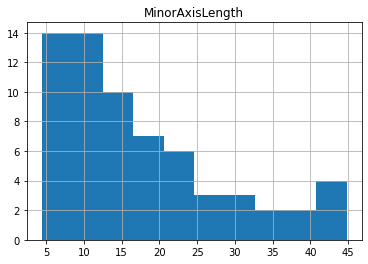

In [88]:
df.hist(column=['MinorAxisLength'], bins=10)

# Sobre problemas grandes e estratégias para resolvê-los.

[[150 141 139 ... 164 165 175]
 [145 139 137 ... 179 172 179]
 [154 149 145 ... 165 170 187]
 ...
 [118 123 130 ... 139 157 195]
 [117 117 117 ... 152 168 200]
 [120 120 122 ... 153 166 188]]
<class 'numpy.ndarray'>
(1536, 2048)


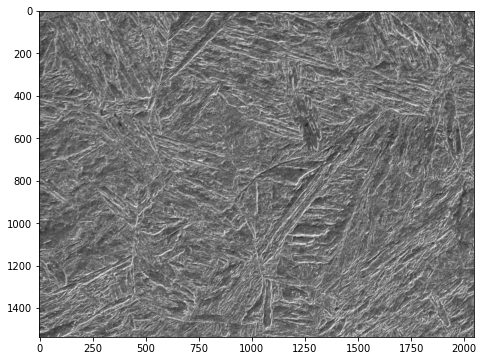

In [89]:
img2 = cv2.imread("/content/300M_SEM_1600x.jpg") 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)  # conversão para níveis de cinza

print(img2)
print(type(img2))
print(img2.shape)

pyplot.figure(figsize=(8,6))
pyplot.imshow(img2, cmap='gray')

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 4.00000e+00,
        1.10000e+01, 1.10000e+01, 4.30000e+01, 6.20000e+01, 2.08000e+02,
        2.47000e+02, 6.68000e+02, 8.27000e+02, 2.11400e+03, 2.43800e+03,
        6.06200e+03, 1.11690e+04, 1.16080e+04, 2.58850e+04, 2.53110e+04,
        5.22230e+04, 4.68160e+04, 8.84230e+04, 7.21830e+04, 1.27849e+05,
        1.48801e+05, 1.08832e+05, 1.73770e+05, 1.20261e+05, 1.84832e+05,
        1.23191e+05, 1.80503e+05, 1.15618e+05, 1.65535e+05, 1.04589e+05,
        1.46605e+05, 1.34081e+05, 8.23260e+04, 1.12513e+05, 6.82590e+04,
        9.36670e+04, 5.66670e+04, 7.64360e+04, 4.57

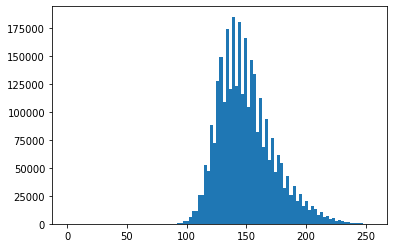

In [90]:
pyplot.hist(img2.flat, bins=100, range=(0,255))

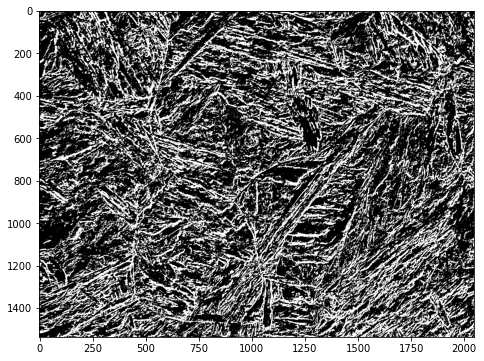

In [91]:
ret1, thresh = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

pyplot.figure(figsize=(8,6))
pyplot.imshow(thresh, cmap='gray')

Solução razoável: Machine Learning!

> 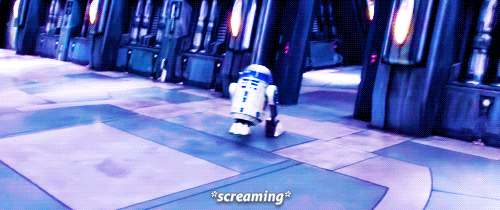

> 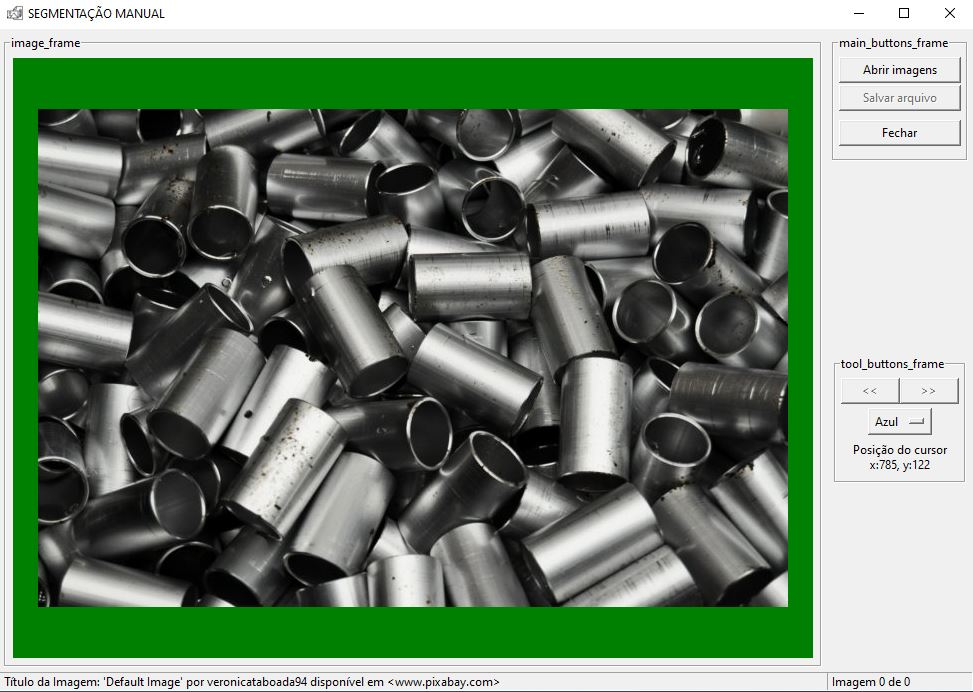

# ~O Fim~

Na verdade, o Princípio...

> 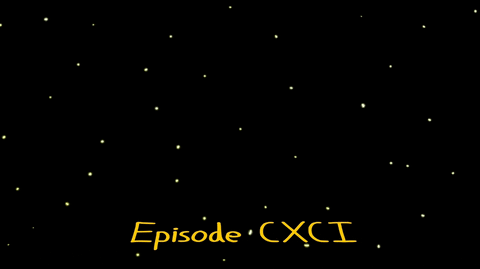



**Informações úteis**

* [link do github para a interface gráfica](https://github.com/hjgobbo/python_course)

* Imagens retiradas de [Pixabay](https://pixabay.com/pt/), [Giphy](https://giphy.com/) e da biblioteca pessoal do autor.

* Agradecimentos ao professor Sreenivas Bhattiprolu que ministra o curso ["Python for Microscopists"](https://www.youtube.com/watch?v=AsTvGxuiqKs). O código para análise de partículas foi adaptado de uma de suas aulas.